### Package Importing

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
data = pd.read_csv("full_airline_review.csv")

In [14]:
data = data[data.recommended == 'no']
data.header = data.header.str.strip('\"”“ ')

### Preporcessing

In [15]:
# Remove Stop words
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')
from nltk.corpus import stopwords, words
from nltk.tokenize import word_tokenize

def clean_stopwords(text):
    words = word_tokenize(text)
    stop_words = set(stopwords.words("english"))
    filtered_words = [word for word in words if word not in stop_words]
    filtered_text = ' '.join(filtered_words)
    return filtered_text

def clean_words(text):
    words_c = word_tokenize(text)
    good_words = set(words.words())
    filtered_words = [word for word in words_c if word in good_words]
    filtered_text = ' '.join(filtered_words)
    return filtered_text

#Lower case
data.content = data.content.apply(lambda x: x.lower())

data.content = data.content.apply(clean_stopwords)
data.content = data.content.apply(clean_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\surya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\surya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\surya\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [16]:
#Lemmatisation
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
def lemmatize_words(text):
    words = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    lemmatized_text = ' '.join(lemmatized_words)
    return lemmatized_text
data.content = data.content.apply(lemmatize_words)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\surya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### WordCloud Analysis

In [17]:
from PIL import Image
from wordcloud import WordCloud

c:\Users\surya\anaconda3\Lib\site-packages\wordcloud\wordcloud.py:35: ResourceWarning: unclosed file <_io.TextIOWrapper name='c:\\Users\\surya\\anaconda3\\Lib\\site-packages\\wordcloud\\stopwords' mode='r' encoding='utf-8'>
  STOPWORDS = set(map(str.strip, open(os.path.join(FILE, 'stopwords')).readlines()))


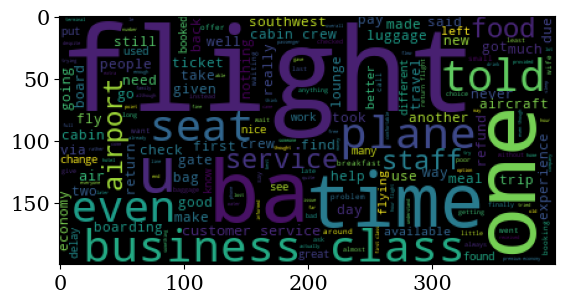

In [18]:
final_st = ""
for st in (list(data[data.recommended=='no'].content.to_numpy())):
    final_st += st
wc = WordCloud().generate(final_st)
plt.imshow(wc)

In [19]:
data.airline.unique()

array(['singapore-airlines', 'qatar-airways', 'emirates',
       'japan-airlines', 'southwest-airlines', 'air-france', 'korean-air',
       'british-airways', 'asiana-airlines', 'airasia'], dtype=object)

In [20]:
def concatenate_series(series):
  return series.to_string()

grouped = data.groupby("airline")['content'].agg(concatenate_series)
grouped = grouped.reset_index()

In [21]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
vectorised_data = tfidf_vectorizer.fit_transform(grouped.content)
tfidf_df = pd.DataFrame(vectorised_data.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

useless_words = set()
for column in tfidf_df.columns:
    for index, value in tfidf_df[column].items():
        if value > 0.3:
            useless_words.add(column)

In [22]:
def remove_useless(text):
    words_c = word_tokenize(text)
    filtered_words = [word for word in words_c if word not in useless_words]
    filtered_text = ' '.join(filtered_words)
    return filtered_text
data.content = data.content.apply(remove_useless)

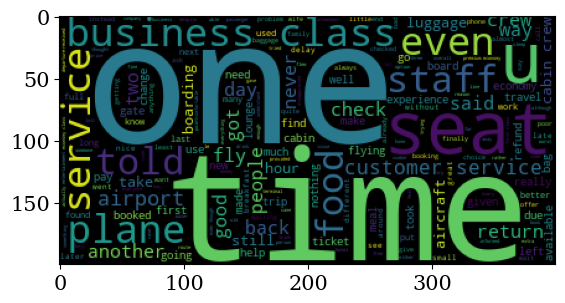

In [23]:
final_st = ""
for st in (list(data[data.recommended=='no'].content.to_numpy())):
    final_st += st
wc = WordCloud().generate(final_st)
plt.imshow(wc)

### Topic Extraction : Aspect Based Sentiment Analysis

In [2]:
from pyabsa import available_checkpoints
checkpoint_map = available_checkpoints()

[2024-04-16 18:09:39] (2.4.1.post1) Please specify the task code, e.g. from pyabsa import TaskCodeOption


In [4]:
from pyabsa import ATEPCCheckpointManager
aspect_extractor = ATEPCCheckpointManager.get_aspect_extractor(
    checkpoint='english',auto_device=True  # False means load model on CPU
    )


[2024-04-16 18:11:27] (2.4.1.post1) ********** Available ATEPC model checkpoints for Version:2.4.1.post1 (this version) **********
[2024-04-16 18:11:27] (2.4.1.post1) ********** Available ATEPC model checkpoints for Version:2.4.1.post1 (this version) **********
[2024-04-16 18:11:27] (2.4.1.post1) Downloading checkpoint:english 
[2024-04-16 18:11:27] (2.4.1.post1) Notice: The pretrained model are used for testing, it is recommended to train the model on your own custom datasets


Find zipped checkpoint: ./checkpoints\ATEPC_ENGLISH_CHECKPOINT\fast_lcf_atepc_English_cdw_apcacc_82.36_apcf1_81.89_atef1_75.43.zip, unzipping


Done.
[2024-04-16 18:12:23] (2.4.1.post1) If the auto-downloading failed, please download it via browser: https://huggingface.co/spaces/yangheng/PyABSA/resolve/main/checkpoints/English/ATEPC/fast_lcf_atepc_English_cdw_apcacc_82.36_apcf1_81.89_atef1_75.43.zip 
[2024-04-16 18:12:23] (2.4.1.post1) Load aspect extractor from checkpoints\ATEPC_ENGLISH_CHECKPOINT\fast_lcf_atepc_English_cdw_apcacc_82.36_apcf1_81.89_atef1_75.43
[2024-04-16 18:12:23] (2.4.1.post1) config: checkpoints\ATEPC_ENGLISH_CHECKPOINT\fast_lcf_atepc_English_cdw_apcacc_82.36_apcf1_81.89_atef1_75.43\fast_lcf_atepc.config
[2024-04-16 18:12:23] (2.4.1.post1) state_dict: checkpoints\ATEPC_ENGLISH_CHECKPOINT\fast_lcf_atepc_English_cdw_apcacc_82.36_apcf1_81.89_atef1_75.43\fast_lcf_atepc.state_dict
[2024-04-16 18:12:23] (2.4.1.post1) model: None
[2024-04-16 18:12:23] (2.4.1.post1) tokenizer: checkpoints\ATEPC_ENGLISH_CHECKPOINT\fast_lcf_atepc_English_cdw_apcacc_82.36_apcf1_81.89_atef1_75.43\fast_lcf_atepc.tokenizer
[2024-04-16 1

config.json:   0%|          | 0.00/579 [00:00<?, ?B/s]

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\huggingface_hub\file_download.py:148: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\surya\.cache\huggingface\hub\models--microsoft--deberta-v3-base. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/371M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

c:\Users\surya\anaconda3\Lib\site-packages\transformers\convert_slow_tokenizer.py:550: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


In [53]:
# Example Code 
examples = ['Â  Â The flight went from Terminal 1, the terminal with limited amenities. I was handed a voucher to a Sats lounge that was overfilled in terminal 1. The gate was chaos, under-dimensioned for the flight with 1 security screening. When I arrived the queue was >50m with a wait of about 20min. While service and entertainment in Economy is as good as one can expect from Singapore Airlines, seat spacing is less than in  other airlines.']
inference_source = examples
example = aspect_extractor.extract_aspect(inference_source=inference_source,  #
                          pred_sentiment=True,  # Predict the sentiment of extracted aspect terms
                          )

[2024-04-17 09:02:55] (2.4.1.post1) The results of aspect term extraction have been saved in d:\CS6220\Project\Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-17 09:02:55] (2.4.1.post1) Example 0: Â Â The flight went from Terminal 1 , the terminal with limited amenities . I was handed a voucher to a Sats lounge that was overfilled in terminal 1 . The <gate:Negative Confidence:0.9965> was chaos , under - dimensioned for the flight with 1 security screening . When I arrived the queue was > 50m with a wait of about 20min . While <service:Positive Confidence:0.9962> and <entertainment:Positive Confidence:0.9963> in Economy is as good as one can expect from Singapore Airlines , <seat:Negative Confidence:0.9894> spacing is less than in other airlines .


In [42]:
# Running the pretrained model on the Dataset
inference_source = list(np.array(data.content))
atepc_result = aspect_extractor.extract_aspect(inference_source=inference_source,  #
                          pred_sentiment=True,  # Predict the sentiment of extracted aspect terms
                          )

classifying aspect sentiments: 100%|██████████| 443/443 [3:53:13<00:00, 31.59s/it]  


[2024-04-17 00:51:43] (2.4.1.post1) The results of aspect term extraction have been saved in d:\CS6220\Project\Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-17 00:51:44] (2.4.1.post1) Example 0: vice verse travelled economy class extra middle aircraft food last u time food <chicken:Negative Confidence:0.967> got finished eat food
[2024-04-17 00:51:44] (2.4.1.post1) Example 1: went terminal terminal limited handed voucher lounge terminal gate chaos security screening queue wait service <entertainment:Negative Confidence:0.6118> economy good one expect <seat spacing:Negative Confidence:0.9959> le
[2024-04-17 00:51:44] (2.4.1.post1) Example 2: disappointed uncomfortable old <seat:Negative Confidence:0.9989> business class combined average <food:Neutral Confidence:0.9548> cabin last least lost bag would fly short haul discount economy class
[2024-04-17 00:51:44] (2.4.1.post1) Example 3: flying business class sin big hassle way night departure inform

In [50]:
aspect_df = pd.DataFrame(atepc_result)
analytical_df = data.reset_index().drop(columns=['Unnamed: 0','index'])

In [52]:
aspect_df.head()

sentence  \
0  vice verse travelled economy class extra middl...   
1  went terminal terminal limited handed voucher ...   
2  disappointed uncomfortable old seat business c...   
3  flying business class sin big hassle way night...   
4  enjoy good reputation however recent experienc...   

                                                 IOB  \
0  [O, O, O, O, O, O, O, O, O, O, O, O, O, B-ASP,...   
1  [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...   
2  [O, O, O, B-ASP, O, O, O, O, B-ASP, O, O, O, O...   
3  [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...   
4  [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...   

                                              tokens  \
0  [vice, verse, travelled, economy, class, extra...   
1  [went, terminal, terminal, limited, handed, vo...   
2  [disappointed, uncomfortable, old, seat, busin...   
3  [flying, business, class, sin, big, hassle, wa...   
4  [enjoy, good, reputation, however, recent, exp...   

                          aspect          position             sentiment  \
0                      [chicken]            [[13]]            [Negative]   
1  [entertainment, seat spacing]  [[15], [20, 21]]  [Negative, Negative]   
2                   [seat, food]        [[3], [8]]   [Negative, Neutral]   
3                      [amenity]            [[54]]            [Negative]   
4                             []                []                    []   

                                               probs        confidence  
0  [[0.9669824838638306, 0.03249204531311989, 0.0...           [0.967]  
1  [[0.6117755174636841, 0.0011283010244369507, 0...  [0.6118, 0.9959]  
2  [[0.9989157915115356, 0.0008473690249957144, 0...  [0.9989, 0.9548]  
3  [[0.9227873086929321, 0.0006542730261571705, 0...          [0.9228]  
4                                                 []                []

### Aspect Analysis

In [67]:
final_data = pd.concat([analytical_df,aspect_df], axis=1)
char_sent = final_data[
    ['rating','header','content','airline','recommended','aspect','sentiment']
    ].apply(pd.Series.explode)

In [91]:
grouped = char_sent[char_sent.sentiment=='Negative']\
    .groupby(['airline','aspect'])['content'].count().reset_index()

In [104]:
def top_n(df, n, keep):
    return df.sort_values(by='content', ascending=False).head(n)

# Apply the function within each group
top_aspects_per_airline = grouped.groupby('airline', group_keys=False).apply(top_n, n=10, keep='all')

C:\Users\surya\AppData\Local\Temp\ipykernel_25696\134834774.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_aspects_per_airline = grouped.groupby('airline', group_keys=False).apply(top_n, n=10, keep='all')


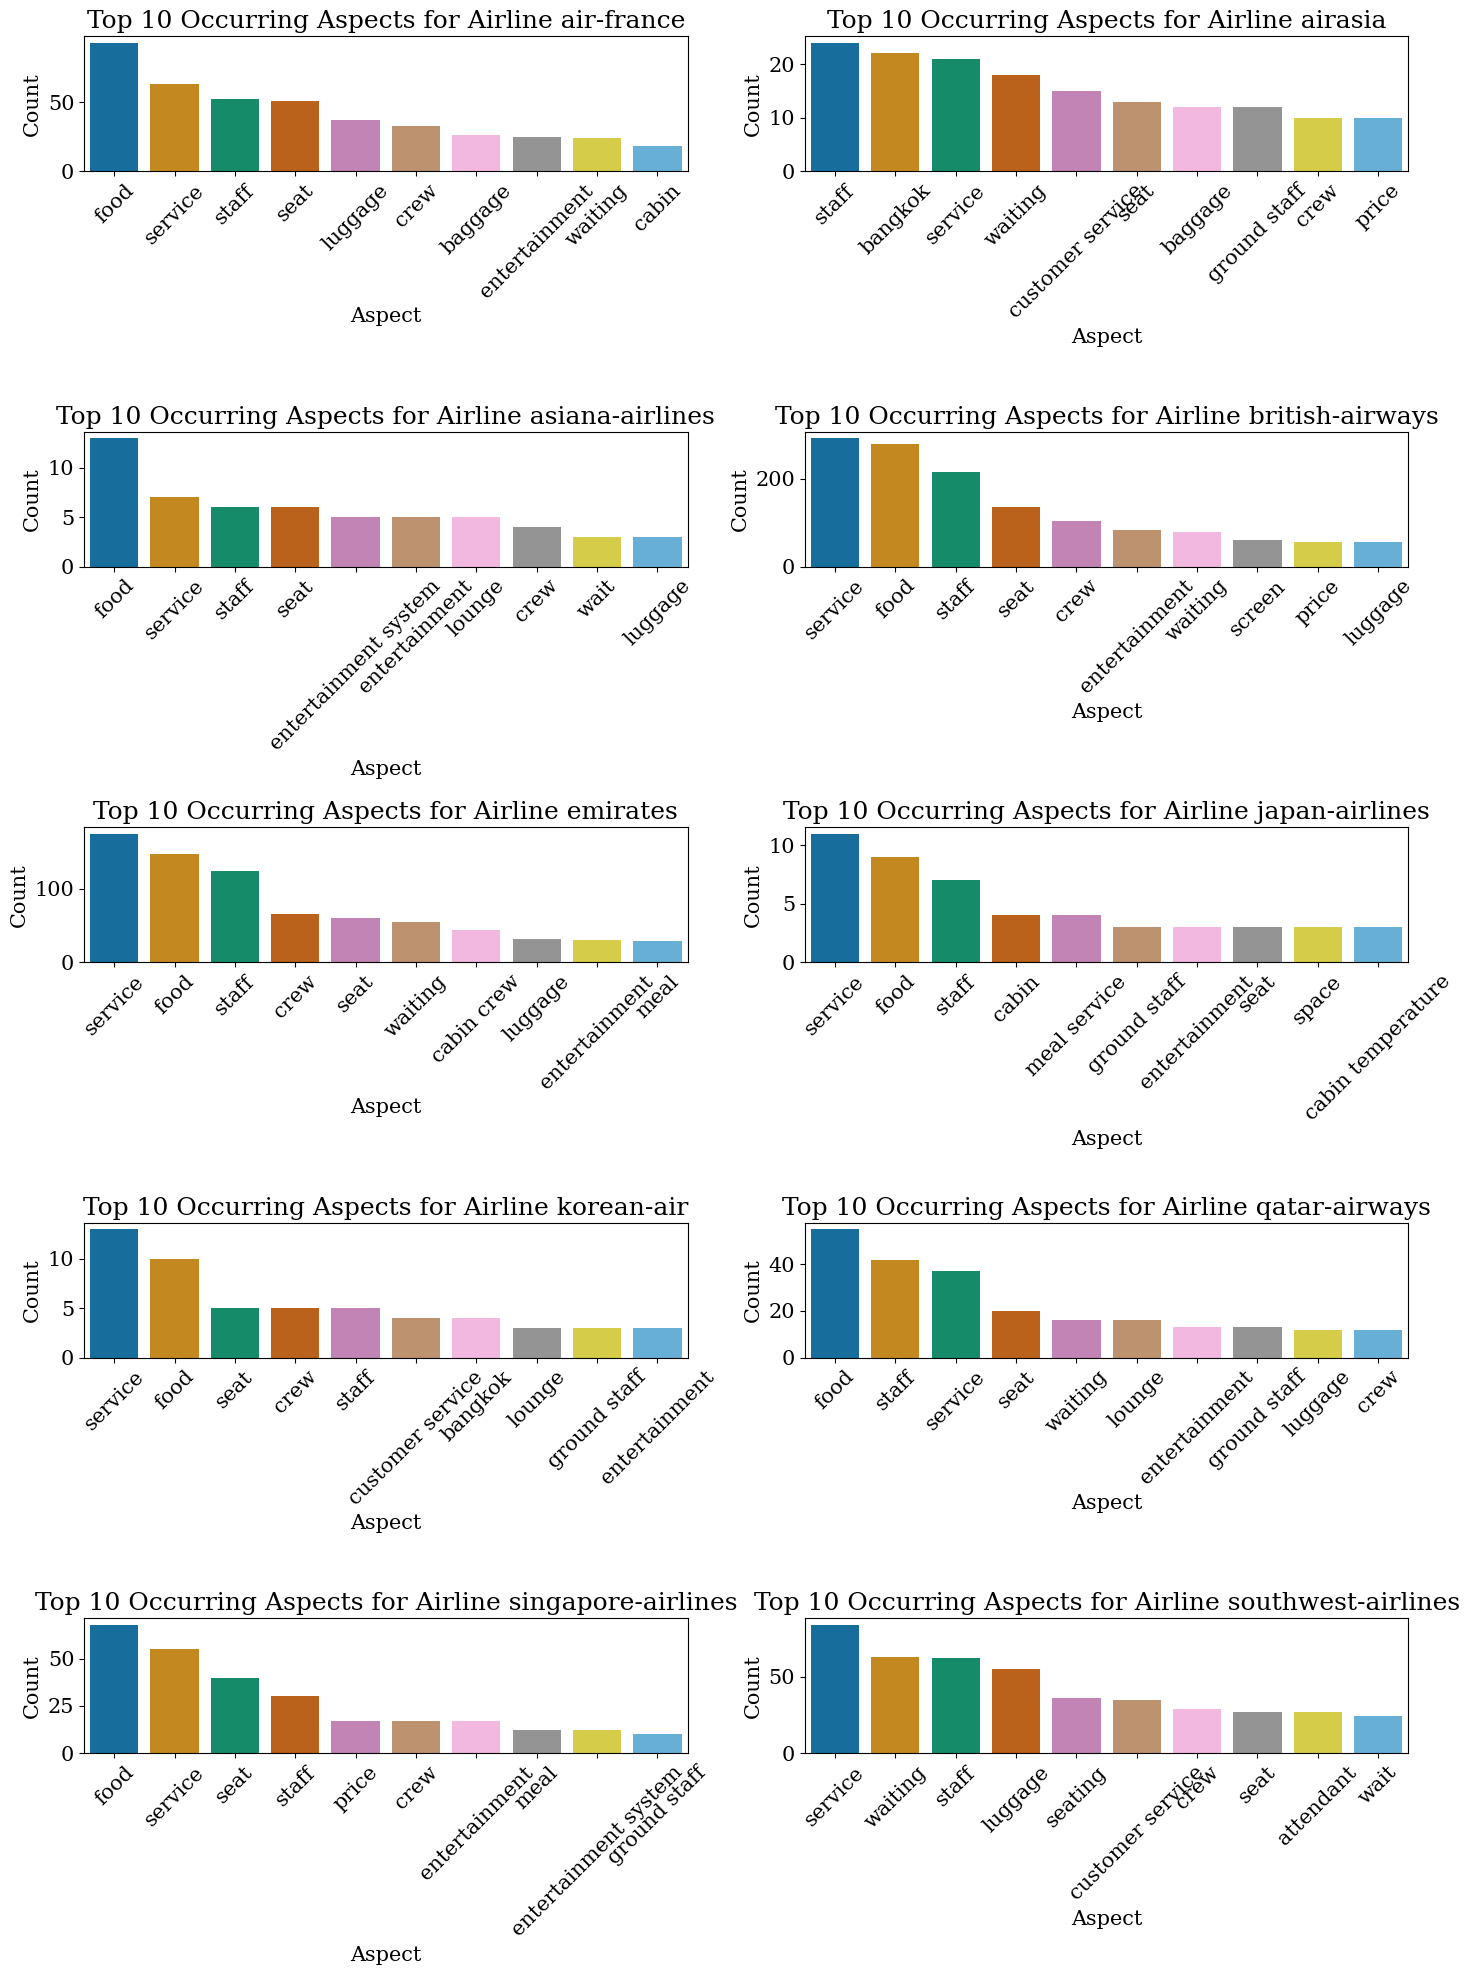

In [106]:
import warnings
warnings.filterwarnings('ignore')
unique_airlines = top_aspects_per_airline['airline'].unique()

fig, axes = plt.subplots(5, 2, figsize=(15, 20))

for idx, airline in enumerate(unique_airlines):
    airline_data = top_aspects_per_airline[top_aspects_per_airline['airline'] == airline]
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]
    sns.barplot(x='aspect', y='content', data=airline_data, ax=ax, palette='colorblind')
    ax.set_title(f'Top 10 Occurring Aspects for Airline {airline}')
    ax.set_xlabel('Aspect')
    ax.set_ylabel('Count')
    ax.set_xticklabels(airline_data['aspect'], rotation=45)

# Hide empty subplots
for i in range(len(unique_airlines), 5 * 2):
    axes.flatten()[i].axis('off')

plt.tight_layout()
plt.show()